In [98]:
import pandas as pd
import numpy as np

In [99]:
df_train = pd.read_csv("SOURCES/titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df_train["Alone"] = df_train["SibSp"] + df_train["Parch"]

In [101]:
df_train["Alone"].value_counts()

Alone
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [102]:
df_train.loc[df_train['Alone'].isin(list(range(1, 11))), 'Alone'] = 1

In [103]:
df_train["Alone"].value_counts()

Alone
0    537
1    354
Name: count, dtype: int64

In [104]:
df_train.drop(columns=["Name", "Ticket", "Cabin", "SibSp", "Parch"], inplace=True)

In [105]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [106]:
df_train.loc[df_train['Sex'].isin(["male"]), 'Sex'] = 1
df_train.loc[df_train['Sex'].isin(["female"]), 'Sex'] = 2
# df_train.replace({"male":1, "female":2}, inplace=True)
df_train.loc[df_train['Embarked'].isin(["S"]), 'Embarked'] = 1
df_train.loc[df_train['Embarked'].isin(["C"]), 'Embarked'] = 2
df_train.loc[df_train['Embarked'].isin(["Q"]), 'Embarked'] = 3
# df_train.replace({"S":1, "C":2, "Q":3}, inplace=True)

In [107]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,1,22.0,7.2500,1,1
1,2,1,1,2,38.0,71.2833,2,1
2,3,1,3,2,26.0,7.9250,1,0
3,4,1,1,2,35.0,53.1000,1,1
4,5,0,3,1,35.0,8.0500,1,0


In [108]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   Alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [109]:
embarked_top = df_train["Embarked"].describe().loc["top"]
embarked_top

1

In [110]:
age_median = df_train["Age"].median()
age_median

28.0

In [111]:
df_train.loc[df_train['Embarked'].isin([np.nan]), 'Embarked'] = embarked_top
df_train.loc[df_train['Age'].isin([np.nan]), 'Age'] = age_median

In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [113]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,1,22.0,7.2500,1,1
1,2,1,1,2,38.0,71.2833,2,1
2,3,1,3,2,26.0,7.9250,1,0
3,4,1,1,2,35.0,53.1000,1,1
4,5,0,3,1,35.0,8.0500,1,0


In [114]:
from matplotlib import pyplot as plt
%matplotlib inline

In [115]:
df0 = df_train[df_train["Survived"]==0]
df1 = df_train[df_train["Survived"]==1]

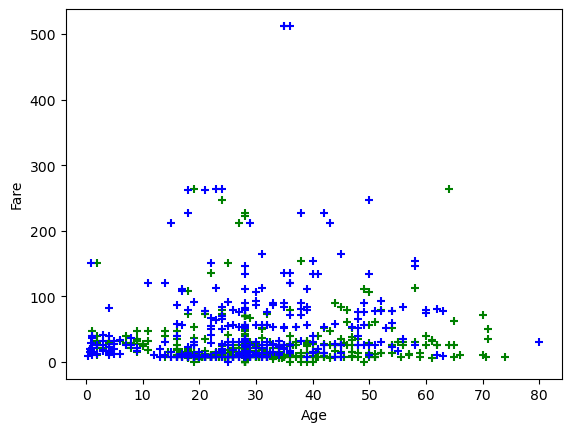

In [116]:
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(df0["Age"], df0["Fare"], color="green", marker="+")
plt.scatter(df1["Age"], df1["Fare"], color="blue", marker="+")

In [117]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,1,22.0,7.2500,1,1
1,2,1,1,2,38.0,71.2833,2,1
2,3,1,3,2,26.0,7.9250,1,0
3,4,1,1,2,35.0,53.1000,1,1
4,5,0,3,1,35.0,8.0500,1,0


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X = df_train.drop(columns=["PassengerId", "Survived"])
X.head()

,Pclass,Sex,Age,Fare,Embarked,Alone
0,3,1,22.0,7.2500,1,1
1,1,2,38.0,71.2833,2,1
2,3,2,26.0,7.9250,1,0
3,1,2,35.0,53.1000,1,1
4,3,1,35.0,8.0500,1,0


In [120]:
y = df_train["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
from sklearn.svm import SVC

# 1. Model

In [123]:
model = SVC()

model.fit(X_train, y_train)

print(model.get_params())

model.score(X_test, y_test)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


0.6536312849162011

# 2. Model (according to "C" param)

In [242]:
my_list = []
for i in list(range(1, 1000)):
    model = SVC(C=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    my_list.append(round(score, 3))

In [243]:
my_list

[0.654,
 0.654,
 0.654,
 0.659,
 0.659,
 0.659,
 0.659,
 0.676,
 0.687,
 0.687,
 0.693,
 0.698,
 0.704,
 0.704,
 0.698,
 0.698,
 0.709,
 0.709,
 0.709,
 0.721,
 0.732,
 0.732,
 0.732,
 0.737,
 0.743,
 0.749,
 0.754,
 0.771,
 0.765,
 0.777,
 0.771,
 0.777,
 0.782,
 0.788,
 0.799,
 0.804,
 0.816,
 0.81,
 0.804,
 0.821,
 0.821,
 0.827,
 0.832,
 0.821,
 0.816,
 0.816,
 0.81,
 0.816,
 0.816,
 0.804,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.793,
 0.799,
 0.799,
 0.799,
 0.799,
 0.804,
 0.804,
 0.804,
 0.804,
 0.804,
 0.799,
 0.799,
 0.799,
 0.799,
 0.799,
 0.793,
 0.799,
 0.799,
 0.799,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0.793,
 0

In [245]:
max_score = sorted(my_list, reverse=True)[0]
max_score

0.832

In [248]:
C = my_list.index(max_score) + 1
C

43

In [163]:
model = SVC(C=C)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8324022346368715

# 2. Model (according to "gamma" param)

In [251]:
my_list = []
gamma_list = np.arange(0.01,1, 0.001)

for i in (gamma_list):
    i = round(i, 3)
    model = SVC(gamma=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    my_list.append(round(score, 3))

In [256]:
max_score = sorted(my_list, reverse=True)[0]
max_score

0.754

In [258]:
max_score_index = my_list.index(max_score)
max_score_index

103

In [259]:
gamma = gamma_list[max_score_index]
gamma

0.1129999999999999

In [262]:
model = SVC(gamma=gamma)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7541899441340782

# 3. Model (according to "C" and "gamma" params)

In [273]:
Cs = list(range(1, 1000))
print(Cs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [295]:
gammas = np.arange(0.001, 1.001, 0.001)
gammas

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,